<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 99106403
Name = 'Mehdi'
Last_Name = 'Abbaszadeh'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [27]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

# New Section
Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [28]:
## FILL HERE
input_dim = tuple(train_set[0][0].shape[1:])
input_dim = input_dim[0] * input_dim[1]
num_classes = len(train_set.classes)
print("number of pixels of each image : {}".format(input_dim))
print("number of classes : {}".format(num_classes))

number of pixels of each image : 784
number of classes : 10


In [29]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

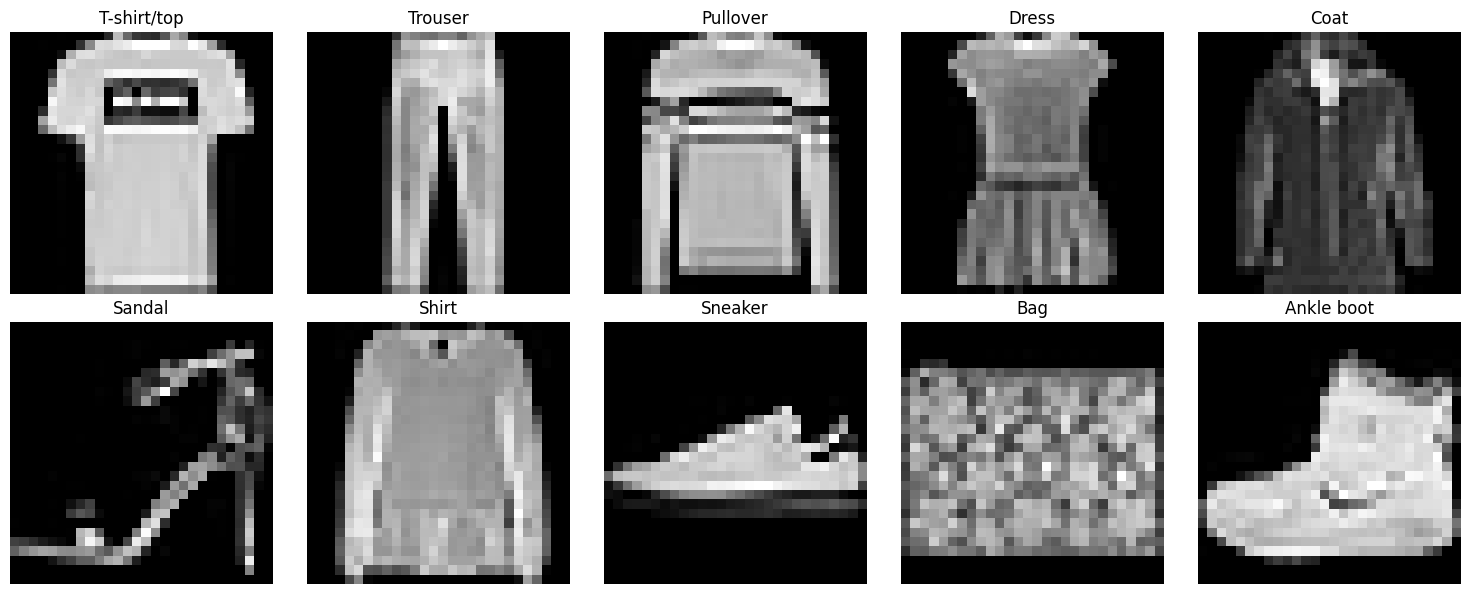

In [30]:
classes = train_set.classes

# Create a dictionary to store one random image from each class
class_images = {class_name: None for class_name in classes}

# Plot one random image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Iterate over the dataset and randomly select one image from each class
for data, target in train_set:
    if class_images[classes[target]] is None:
        class_images[classes[target]] = data
        # Break the loop if all None targets have been replaced
        if None not in class_images.values():
            break

for i, (class_name, image) in enumerate(class_images.items()):
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [31]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [32]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [33]:
def affine_forward(x, w, b):
    ## FILL HERE
    return x @ w + b

def relu(x):
    ## FILL HERE
    return torch.max(x, torch.tensor(0.0))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [34]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    ## FILL HERE
    # Iterate through the layers in the parameters dictionary
    for i in range(num_layers):
        # Retrieve the weight and bias parameters for the current layer
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']

        # Perform affine transformation
        z = affine_forward(x, w, b)

        # Apply ReLU activation
        x = relu(z)

    output = z
    return output

Implementing cross entropy loss:

In [35]:
def cross_entropy_loss(scores, y):
    n = len(y)
    ## FILL HERE
    exp_scores = torch.exp(scores - torch.max(scores, dim=1, keepdim=True)[0])  # Subtract max for preventing overflow
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    # extrack the probabilities for true classes
    correct_class_probs = probs[torch.arange(n), y]
    # compute the negative log of probs
    loss = -torch.sum(torch.log(correct_class_probs))/n
    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [36]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    ## FILL HERE
    for param_name, param in parameters.items():
        # Update parameter value using its gradient and learning rate
        param.data -= learning_rate * param.grad.data

        # Zero out the gradients after updating parameter value
        param.grad.data.zero_()

Training functions:

In [37]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    acc = np.sum(y_pred == y_true)/len(y_true)
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        # calculating the loss
        loss = cross_entropy_loss(p, y)
        # backward method
        loss.backward()
        # Optimize the model parameters
        sgd_optimizer(parameters)

        # Accumulate training loss
        train_loss += loss.item()*y.shape[0]

        # Print train loss for each batch
        print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item()}')

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    train_loss /= N_train
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        # calculating the loss
        loss = cross_entropy_loss(p, y)
        # Print loss for each batch
        print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item()}')

        # Accumulate the loss
        total_loss += loss.item()*y.shape[0]

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [38]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [39]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        test_loss, test_acc = validate(test_loader, epoch, set_name='test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    ## plot the loss history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()


    ## plot the accuracy history of training and test sets
    ## FILL HERE
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()

    plt.tight_layout()
    plt.show()

Streaming output truncated to the last 5000 lines.
Epoch 48, Batch 635, Loss: 0.6197690367698669
Epoch 48, Batch 636, Loss: 0.5997843146324158
Epoch 48, Batch 637, Loss: 0.5355957746505737
Epoch 48, Batch 638, Loss: 0.5756000876426697
Epoch 48, Batch 639, Loss: 0.6485342979431152
Epoch 48, Batch 640, Loss: 0.5476359128952026
Epoch 48, Batch 641, Loss: 0.7237305045127869
Epoch 48, Batch 642, Loss: 0.5457763075828552
Epoch 48, Batch 643, Loss: 0.5552148222923279
Epoch 48, Batch 644, Loss: 0.5666659474372864
Epoch 48, Batch 645, Loss: 0.6417436003684998
Epoch 48, Batch 646, Loss: 0.7103447914123535
Epoch 48, Batch 647, Loss: 0.792681872844696
Epoch 48, Batch 648, Loss: 0.3837965130805969
Epoch 48, Batch 649, Loss: 0.7750023603439331
Epoch 48, Batch 650, Loss: 0.5237335562705994
Epoch 48, Batch 651, Loss: 0.5007643103599548
Epoch 48, Batch 652, Loss: 0.5480163097381592
Epoch 48, Batch 653, Loss: 0.6394902467727661
Epoch 48, Batch 654, Loss: 0.45391449332237244
Epoch 48, Batch 655, Loss: 0.

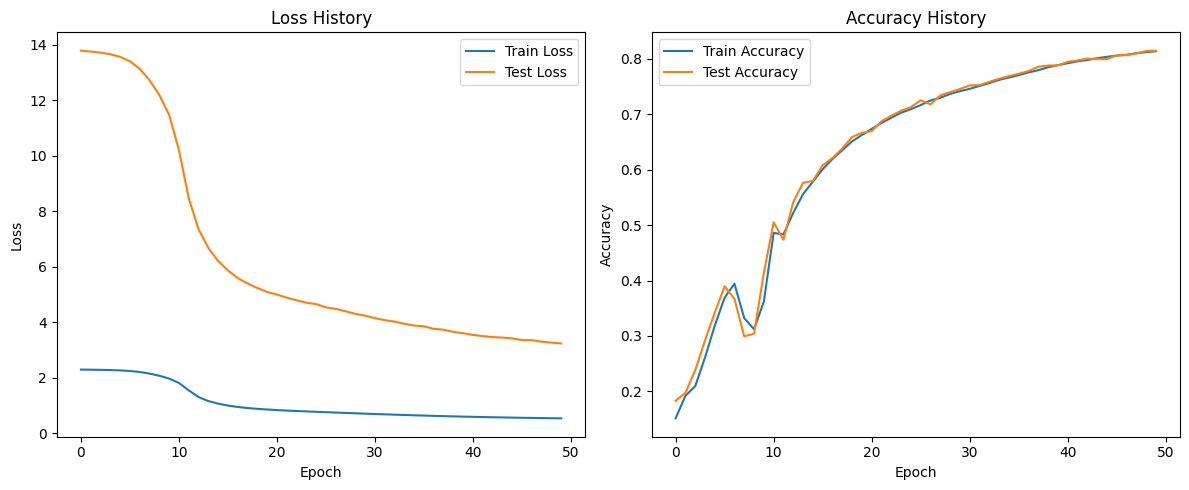

In [40]:
train_model([train_loader, test_loader], num_epochs=50, learning_rate=0.005)

In [41]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8145833333333333


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

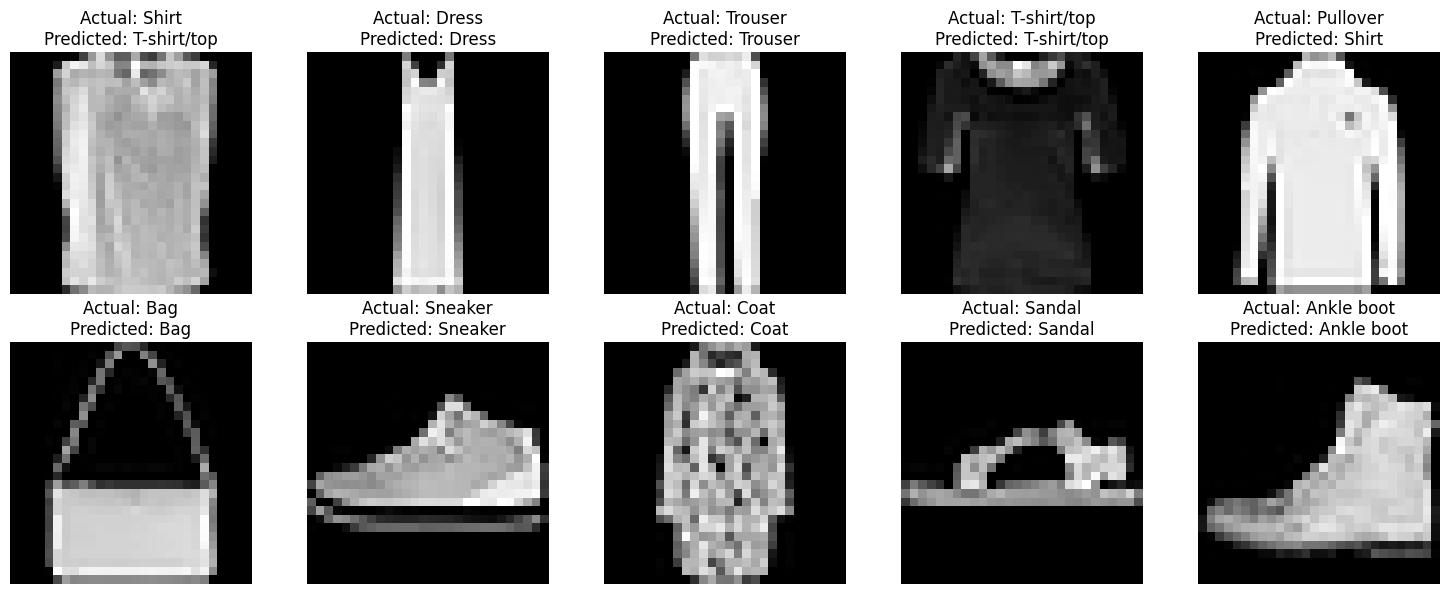

In [42]:
## FILL HERE
def visualize_predictions(dataloader, model, parameters, num_layers, class_names):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    images = []
    actual_labels = []
    predicted_labels = []

    # Find one image for each class
    found_classes = set()
    for x, y in dataloader:
        for img, label in zip(x, y):
            if label.item() not in found_classes:
                images.append(img)
                actual_labels.append(label.item())
                found_classes.add(label.item())
            if len(found_classes) == len(class_names):
                break
        if len(found_classes) == len(class_names):
            break

    images = torch.stack(images).to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(images, parameters, num_layers)
        predicted_labels = outputs.argmax(dim=-1).cpu().numpy()

    # Plot images with labels
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for i, (img, actual, predicted) in enumerate(zip(images, actual_labels, predicted_labels)):
        img = img.cpu().numpy().squeeze()  # Remove channel dimension for grayscale images

        ax = axes[i]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f'Actual: {class_names[actual]}\nPredicted: {class_names[predicted]}')

    plt.tight_layout()
    plt.show()

visualize_predictions(test_loader, model, parameters, num_layers, test_set.classes)